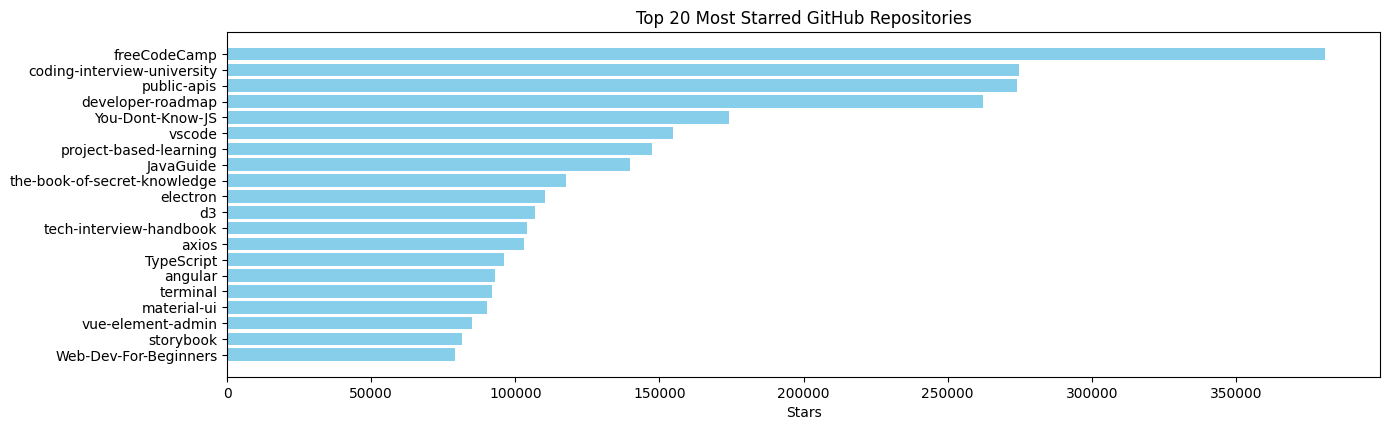

In [8]:
import requests
import json
import matplotlib.pyplot as plt
from google.colab import userdata

token = userdata.get('ghtokenjesus')

headers = {"Authorization": "Bearer " + token}

# Fetch top 20 starred repositories
n = 20
repositories_response = requests.get('https://api.github.com/search/repositories?q=stars:>1&sort=stars', headers=headers)
repositories = repositories_response.json()['items'][:n]

# Sort repositories based on stars (from best to worst)
repositories.sort(key=lambda x: x['stargazers_count'], reverse=True)

# Extracting data for visualization
repository_names = [repo['name'] for repo in repositories]
repository_stars = [repo['stargazers_count'] for repo in repositories]

# Visualization with Matplotlib
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 2)
plt.barh(repository_names[::-1], repository_stars[::-1], color='skyblue')
plt.xlabel('Stars')
plt.title('Top 20 Most Starred GitHub Repositories')
plt.tight_layout()

plt.show()